In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
clade21 = pd.read_csv('/Users/qiqiy/Documents/P2_WAI/Data/2.3.2.1fAreaDTA_MJs_bi.txt')
clade21['year'] = np.floor(clade21['date'])
clade21['dateinyear'] = clade21['date'] - clade21['year']
clade21['od'] = clade21['origin'] + '-' + clade21['destination']
clade21['days'] = clade21['dateinyear']*365

conditions = [
    (clade21['days'] < 32),
    (clade21['days'] >= 32) & (clade21['days'] < 60),
    (clade21['days'] >= 60) & (clade21['days'] < 91),
    (clade21['days'] >= 91) & (clade21['days'] < 121),
    (clade21['days'] >= 121) & (clade21['days'] < 152),
    (clade21['days'] >= 152) & (clade21['days'] < 182),
    (clade21['days'] >= 182) & (clade21['days'] < 213),
    (clade21['days'] >= 213) & (clade21['days'] < 244),
    (clade21['days'] >= 244) & (clade21['days'] < 274),
    (clade21['days'] >= 274) & (clade21['days'] < 305),
    (clade21['days'] >= 305) & (clade21['days'] < 335),
    (clade21['days'] >= 335) & (clade21['days'] < 366),
]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
clade21['month'] = np.select(conditions, months)
clade21_bf3 = clade21.loc[clade21['od'].isin(['CA-Mongolia','JapanKorea-Mongolia','JapanKorea-Russia','Mongolia-Africa','Mongolia-CA','Mongolia-Europe','Mongolia-JapanKorea','Mongolia-NChina','Mongolia-Qinghai','Mongolia-Russia','Mongolia-WA','NChina-Qinghai','NChina-SChina','Qinghai-Russia','SChina-CA','SChina-JapanKorea','SChina-SEA','SChina-WA','SEA-Europe','WA-Africa','WA-CA','WA-Europe'])]

" clade21_bf3_dup3 = clade21_bf3\nclade21_bf3_dup3.loc[:,'year']=3\nclade21_bf3.loc[:,'year']=1\nclade21_bf3_dup2 = clade21_bf3.copy()\nclade21_bf3_dup2['year']=2\nclade21_bf3_dup3 = clade21_bf3.copy()\nclade21_bf3_dup3['year']=3\nclade21_bf3_dups = pd.concat([clade21_bf3,clade21_bf3_dup2,clade21_bf3_dup3])\nclade21_bf3 = clade21_bf3_dups.copy() "

In [18]:
# every year-month
od_migtimes = clade21.groupby(['od','year','month'])['Unnamed: 0'].count().reset_index()
od_migtimes['month'] = pd.Categorical(od_migtimes['month'],months)
od_migtimes = od_migtimes.sort_values('year').sort_values(['od','year','month']).reset_index()

od_migtimes_bf3 = clade21_bf3.groupby(['od','year','month'])['Unnamed: 0'].count().reset_index()
od_migtimes_bf3['month'] = pd.Categorical(od_migtimes_bf3['month'],months)
od_migtimes_bf3 = od_migtimes_bf3.sort_values("year").sort_values(['od','year','month']).reset_index()
od_migtimes_bf3 = od_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_migtimes_bf3.to_csv('virus_od_migtimes_bf3_2.3.2.1.csv')

In [ ]:
# every month 
od_month_migtimes = clade21.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes['month'] = pd.Categorical(od_month_migtimes['month'],months)
od_month_migtimes = od_month_migtimes.sort_values("month").sort_values(['od','month']).reset_index()

clade21_bf3_dup3 = clade21_bf3
clade21_bf3_dup3.loc[:,'year']=3
clade21_bf3.loc[:,'year']=1
clade21_bf3_dup2 = clade21_bf3.copy()
clade21_bf3_dup2['year']=2
clade21_bf3_dup3 = clade21_bf3.copy()
clade21_bf3_dup3['year']=3
clade21_bf3_dups = pd.concat([clade21_bf3,clade21_bf3_dup2,clade21_bf3_dup3])
clade21_bf3 = clade21_bf3_dups.copy()

od_month_migtimes_bf3 = clade21_bf3.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes_bf3['month'] = pd.Categorical(od_month_migtimes_bf3['month'],months)
od_month_migtimes_bf3 = od_month_migtimes_bf3.sort_values("month").sort_values(['od','month']).reset_index()
od_month_migtimes_bf3 = od_month_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_month_migtimes_bf3.to_csv('virus_od_month_migtimes_bf3_2.3.2.1.csv')

In [8]:
clade21_bf3.loc[:,'days']=clade21_bf3.loc[:,'dateinyear']*365 + (clade21_bf3.loc[:,'year']-1)*365
clade21_bf3 = clade21_bf3.sort_values("od")

In [9]:
## violin plot 2 
#fig = plt.figure(figsize=(20,20))
g = sns.catplot(
    y="od", 
    x="days", kind="violin", split=True,
    data=clade21_bf3,width=1,color= 'grey')
g.fig.set_figwidth(10)
g.fig.set_figheight(20)

plt.yticks(fontsize=16)
plt.xticks(ticks=[0,32,60,91,121,152,182,213,244,274,305,335,
                  365,397,425,456,486,517,547,578,609,639,670,700,
                  730,762,790,821,851,882,912,943,974,1004,1035,1065],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Dec 30','','Mar','','May','','Jul','','Sep','','Nov',''],fontsize=16)
plt.ylabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.xlabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.xlim([365,730])
#plt.show()
g.savefig('clade2.3.2.1_jumps_bf3_violinpl.pdf')

In [19]:
clade = pd.read_csv('/Users/qiqiy/Documents/P2_WAI/Data/2.3.4.4New_RandSub_MJs_bi.txt')
clade['year'] = np.floor(clade['date'])
clade['dateinyear'] = clade['date'] - clade['year']
clade['od'] = clade['origin'] + '-' + clade['destination']
clade['days'] = clade['dateinyear']*365

conditions = [
    (clade['days'] < 32),
    (clade['days'] >= 32) & (clade['days'] < 60),
    (clade['days'] >= 60) & (clade['days'] < 91),
    (clade['days'] >= 91) & (clade['days'] < 121),
    (clade['days'] >= 121) & (clade['days'] < 152),
    (clade['days'] >= 152) & (clade['days'] < 182),
    (clade['days'] >= 182) & (clade['days'] < 213),
    (clade['days'] >= 213) & (clade['days'] < 244),
    (clade['days'] >= 244) & (clade['days'] < 274),
    (clade['days'] >= 274) & (clade['days'] < 305),
    (clade['days'] >= 305) & (clade['days'] < 335),
    (clade['days'] >= 335) & (clade['days'] < 366),
]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
clade['month'] = np.select(conditions, months)
od_month_migtimes = clade.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes['month'] = pd.Categorical(od_month_migtimes['month'],months)
od_month_migtimes = od_month_migtimes.sort_values("month").sort_values(['od','month']).reset_index()
clade_bf3 = clade.loc[clade['od'].isin(['SChina-JapanKorea','Russia-Africa','Russia-CA','SEA-SChina','Europe-USAandCanada','USAandCanada-Europe','Africa-Europe','SEA-Russia','CA-JapanKorea','USAandCanada-JapanKorea','WA-Africa','Russia-SChina','JapanKorea-SChina','Europe-JapanKorea','SEA-JapanKorea','JapanKorea-NChina','Europe-WA','NChina-JapanKorea','Africa-Russia','Europe-Africa','NChina-CA','CA-Mongolia','JapanKorea-Russia','JapanKorea-USAandCanada','NChina-SChina','Russia-WA','SChina-SEA','Russia-Europe','USAandCanada-LA','Russia-NChina','SChina-NChina'])] # UPDATE ROUTES WITH BF>3 

In [20]:
# every year-month
od_migtimes_bf3 = clade_bf3.groupby(['od','year','month'])['Unnamed: 0'].count().reset_index()
od_migtimes_bf3['month'] = pd.Categorical(od_migtimes_bf3['month'],months)
od_migtimes_bf3 = od_migtimes_bf3.sort_values("year").sort_values(['od','year','month']).reset_index()
od_migtimes_bf3 = od_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_migtimes_bf3.to_csv('virus_od_migtimes_bf3_2.3.4.4New.csv')

In [ ]:
# every month
clade_bf3_dup3 = clade_bf3
clade_bf3_dup3.loc[:,'year']=3
clade_bf3.loc[:,'year']=1
clade_bf3_dup2 = clade_bf3.copy()
clade_bf3_dup2['year']=2
clade_bf3_dup3 = clade_bf3.copy()
clade_bf3_dup3['year']=3
clade_bf3_dups = pd.concat([clade_bf3,clade_bf3_dup2,clade_bf3_dup3])
clade_bf3 = clade_bf3_dups.copy()
od_month_migtimes_bf3 = clade_bf3.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes_bf3['month'] = pd.Categorical(od_month_migtimes_bf3['month'],months)
od_month_migtimes_bf3 = od_month_migtimes_bf3.sort_values("month").sort_values(['od','month']).reset_index()
od_month_migtimes_bf3 = od_month_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_month_migtimes_bf3.to_csv('virus_od_month_migtimes_bf3_2.3.4.4New.csv')

In [3]:
clade_bf3.loc[:,'year']=1
clade_bf3_dup2 = clade_bf3.copy()
clade_bf3_dup2['year']=2
clade_bf3_dup3 = clade_bf3.copy()
clade_bf3_dup3['year']=3
clade_bf3_dups = pd.concat([clade_bf3,clade_bf3_dup2,clade_bf3_dup3])
clade_bf3 = clade_bf3_dups.copy()

In [4]:
NS_order = ['Africa-Russia','SEA-Russia','Africa-Europe','SEA-JapanKorea','CA-Mongolia','JapanKorea-Russia','SChina-JapanKorea','SChina-NChina','CA-JapanKorea','SEA-SChina','USAandCanada-Europe','JapanKorea-USAandCanada','NChina-JapanKorea','JapanKorea-NChina','USAandCanada-JapanKorea','Russia-Europe','Europe-USAandCanada','SChina-SEA','Europe-JapanKorea','NChina-CA','NChina-SChina','JapanKorea-SChina','Europe-WA','Russia-NChina','Russia-WA','WA-Africa','Russia-CA','Russia-SChina','Europe-Africa','Russia-Africa','USAandCanada-LA']
clade_bf3.loc[:,'days']=clade_bf3.loc[:,'dateinyear']*365 + (clade_bf3.loc[:,'year']-1)*365
clade_bf3['od'] = pd.Categorical(clade_bf3['od'], NS_order)
clade_bf3 = clade_bf3.sort_values("od")

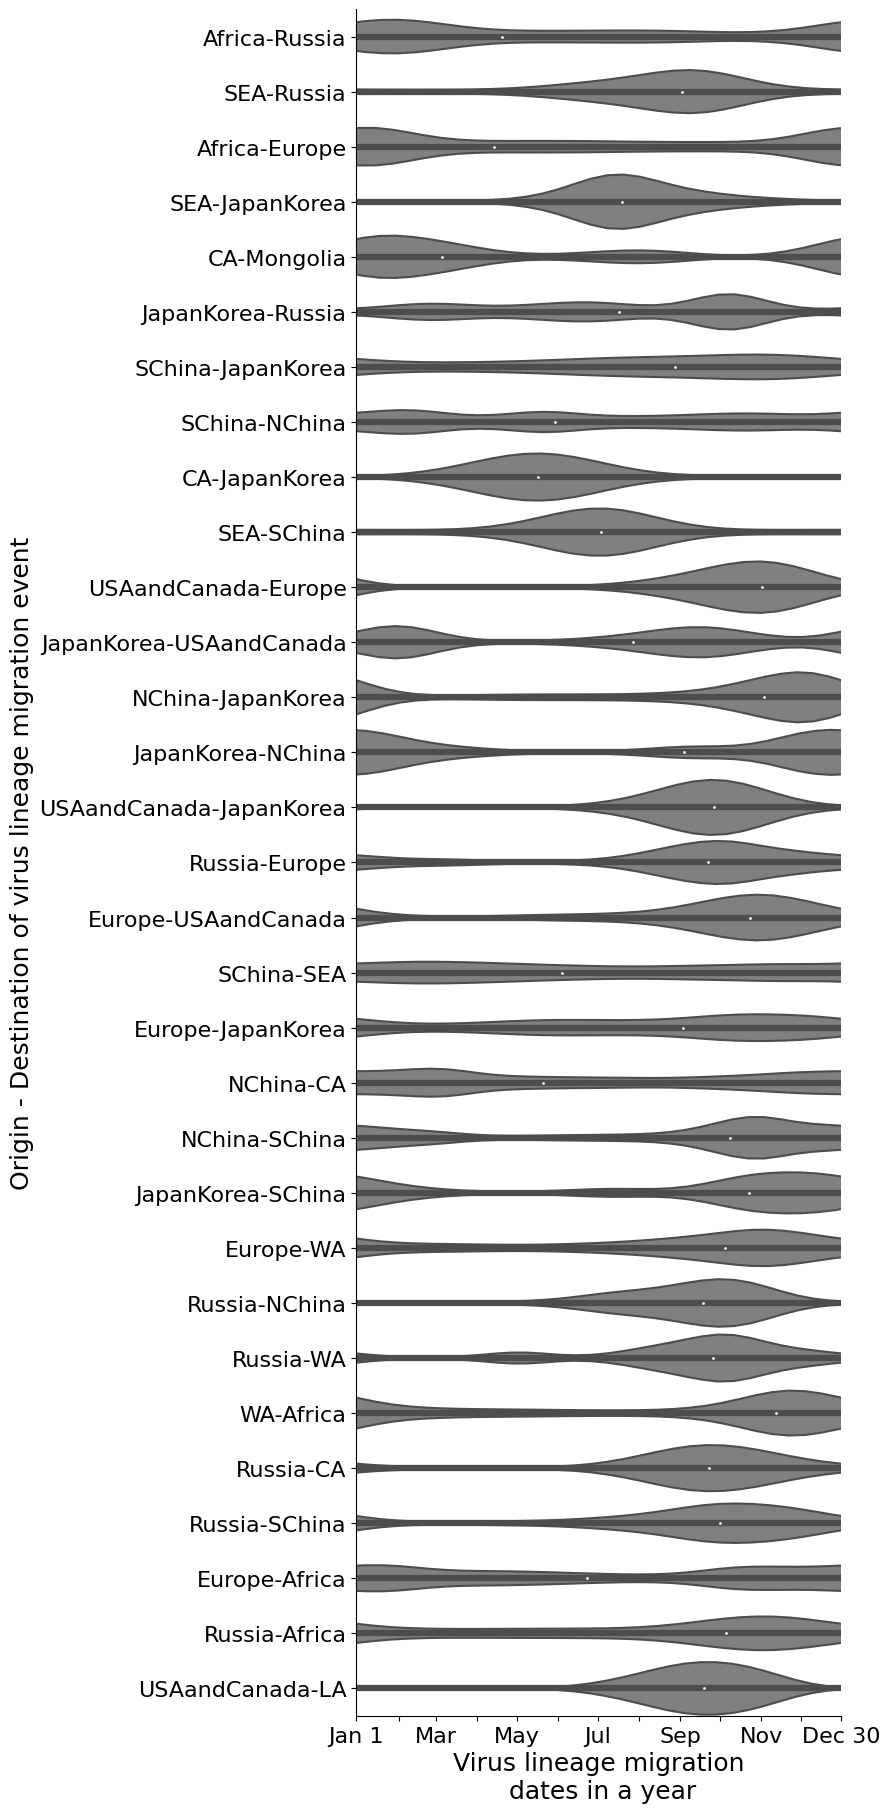

In [5]:
## violin plot 2 
#fig = plt.figure(figsize=(20,20))
g = sns.catplot(
    y="od", 
    x="days", kind="violin", split=True,
    data=clade_bf3,width=1,color= 'grey')
g.fig.set_figwidth(10)
g.fig.set_figheight(20)

plt.yticks(fontsize=16)
plt.xticks(ticks=[0,32,60,91,121,152,182,213,244,274,305,335,
                  365,397,425,456,486,517,547,578,609,639,670,700,
                  730,762,790,821,851,882,912,943,974,1004,1035,1065],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Dec 30','','Mar','','May','','Jul','','Sep','','Nov',''],fontsize=16)
plt.ylabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.xlabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.xlim([365,730])
#plt.show()
g.savefig('clade2.3.4.4New_jumps_bf3_violinpl.pdf')

In [22]:
clade34 = pd.read_csv('/Users/qiqiy/Documents/P2_WAI/Data/2.3.4.4fAreaDTA_MJs_bi.txt')
clade34['year'] = np.floor(clade34['date'])
clade34['dateinyear'] = clade34['date'] - clade34['year']
clade34['od'] = clade34['origin'] + '-' + clade34['destination']
clade34['days'] = clade34['dateinyear']*365

conditions = [
    (clade34['days'] < 32),
    (clade34['days'] >= 32) & (clade34['days'] < 60),
    (clade34['days'] >= 60) & (clade34['days'] < 91),
    (clade34['days'] >= 91) & (clade34['days'] < 121),
    (clade34['days'] >= 121) & (clade34['days'] < 152),
    (clade34['days'] >= 152) & (clade34['days'] < 182),
    (clade34['days'] >= 182) & (clade34['days'] < 213),
    (clade34['days'] >= 213) & (clade34['days'] < 244),
    (clade34['days'] >= 244) & (clade34['days'] < 274),
    (clade34['days'] >= 274) & (clade34['days'] < 305),
    (clade34['days'] >= 305) & (clade34['days'] < 335),
    (clade34['days'] >= 335) & (clade34['days'] < 366),
]

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
clade34['month'] = np.select(conditions, months)
clade34_bf3 = clade34.loc[clade34['od'].isin(['Europe-Africa','Europe-CA','Europe-JapanKorea','Europe-Qinghai','Europe-Russia','JapanKorea-Europe','JapanKorea-SChina','JapanKorea-USAandCanada','NChina-Europe','NChina-JapanKorea','NChina-Qinghai','NChina-SChina','Qinghai-Europe','Russia-Africa','Russia-Europe','SChina-JapanKorea','SChina-NChina','SChina-SEA','SEA-SChina','USAandCanada-JapanKorea'])]

In [23]:
# every year-month
od_migtimes_bf3 = clade34_bf3.groupby(['od','year','month'])['Unnamed: 0'].count().reset_index()
od_migtimes_bf3['month'] = pd.Categorical(od_migtimes_bf3['month'],months)
od_migtimes_bf3 = od_migtimes_bf3.sort_values("year").sort_values(['od','year','month']).reset_index()
od_migtimes_bf3 = od_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_migtimes_bf3.to_csv('virus_od_migtimes_bf3.csv')

In [ ]:
# every month
od_month_migtimes = clade34.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes['month'] = pd.Categorical(od_month_migtimes['month'],months)
od_month_migtimes = od_month_migtimes.sort_values("month").sort_values(['od','month']).reset_index()

clade34_bf3.loc[:,'year']=1
clade34_bf3_dup2 = clade34_bf3.copy()
clade34_bf3_dup2['year']=2
clade34_bf3_dup3 = clade34_bf3.copy()
clade34_bf3_dup3['year']=3
clade34_bf3_dups = pd.concat([clade34_bf3,clade34_bf3_dup2,clade34_bf3_dup3])
clade34_bf3 = clade34_bf3_dups.copy()

od_month_migtimes_bf3 = clade34_bf3.groupby(['od','month'])['Unnamed: 0'].count().reset_index()
od_month_migtimes_bf3['month'] = pd.Categorical(od_month_migtimes_bf3['month'],months)
od_month_migtimes_bf3 = od_month_migtimes_bf3.sort_values("month").sort_values(['od','month']).reset_index()
od_month_migtimes_bf3 = od_month_migtimes_bf3.rename(columns={'Unnamed: 0': 'counts'})
od_month_migtimes_bf3.to_csv('../data/virus_od_month_migtimes_bf3.csv')

In [ ]:
NS_order34 = ['SChina-JapanKorea','SChina-NChina','Qinghai-Europe','NChina-Europe','JapanKorea-Europe','SEA-SChina','Europe-Russia','JapanKorea-USAandCanada','NChina-JapanKorea','NChina-Qinghai','USAandCanada-JapanKorea','Russia-Europe','SChina-SEA','Europe-JapanKorea','Europe-Qinghai','NChina-SChina','JapanKorea-SChina','Europe-CA','Europe-Africa','Russia-Africa']
clade34_bf3.loc[:,'days']=clade34_bf3.loc[:,'dateinyear']*365 + (clade34_bf3.loc[:,'year']-1)*365
clade34_bf3['od'] = pd.Categorical(clade34_bf3['od'], NS_order34)
clade34_bf3 = clade34_bf3.sort_values("od")

In [ ]:
fig = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90,fontsize=16)

plt.yticks(ticks=[0,30,60,90,120,150,180,210,240,270,300,330,365,],labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','','Dec 31'],fontsize=16)
bwp_34 = sns.boxplot(
    x="od", 
    y="days", 
    data=clade34_bf3, whis=())
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.tight_layout()
fig.savefig('../output/clade2.3.4.4_jumps_bf3.svg')

In [ ]:
c34_dis = clade34_bf3.groupby(['od'])['days'].describe(percentiles=[.025, .25, .5, .75, .975])
c34_dis.to_csv('../data/2.3.4.4_mj_dis.csv')
c34_dis

In [ ]:
## violin plot
#fig = plt.figure(figsize=(20,20))
g = sns.catplot(
    x="od", 
    y="days", kind="violin", split=True,
    data=clade34_bf3,width=1,color= 'grey')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

plt.xticks(rotation=90,fontsize=16)
plt.yticks(ticks=[0,32,60,91,121,152,182,213,244,274,305,335,
                  365,397,425,456,486,517,547,578,609,639,670,700,
                  730,762,790,821,851,882,912,943,974,1004,1035,1065],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Dec 30','','Mar','','May','','Jul','','Sep','','Nov',''],fontsize=16)
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.ylim([365,730])
plt.show()
#g.savefig('../output/clade2.3.4.4_jumps_bf3_violinpl_short.pdf')

In [ ]:
## violin plot 2 
#fig = plt.figure(figsize=(20,20))
g = sns.catplot(
    y="od", 
    x="days", kind="violin", split=True,
    data=clade34_bf3,width=1,color= 'grey')
g.fig.set_figwidth(10)
g.fig.set_figheight(20)

plt.yticks(fontsize=16)
plt.xticks(ticks=[0,32,60,91,121,152,182,213,244,274,305,335,
                  365,397,425,456,486,517,547,578,609,639,670,700,
                  730,762,790,821,851,882,912,943,974,1004,1035,1065],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Jan 1','','Mar','','May','','Jul','','Sep','','Nov','',
                  'Dec 30','','Mar','','May','','Jul','','Sep','','Nov',''],fontsize=16)
plt.ylabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.xlabel('Virus lineage migration\n dates in a year',fontsize=18)
plt.xlim([365,730])
plt.show()
#g.savefig('../output/clade2.3.4.4_jumps_bf3_violinpl2.pdf')

### Disribution of earliest virus lineage migration event in a year

In [ ]:
clade34_mindatInYr_bf3 = clade34_bf3.groupby(['treeNumber','od'])['dateinyear'].min().reset_index()
clade34_mindatInYr_bf3['days']=clade34_mindatInYr_bf3['dateinyear']*365
clade34_mindatInYr_bf3 = clade34_mindatInYr_bf3.sort_values('od')

In [ ]:
clade34_mindatInYr_bf3['od'] = pd.Categorical(clade34_mindatInYr_bf3['od'], NS_order34)
clade34_mindatInYr_bf3 = clade34_mindatInYr_bf3.sort_values("od")

In [ ]:
fig34 = plt.figure(figsize=(20, 7))
plt.xticks(rotation=90,fontsize=16)
plt.yticks(ticks=[0,30,60,90,120,150,180,210,240,270,300,330,365],
           labels=['Jan 1','','Mar','','May','','Jul','','Sep','','Nov','','Dec 31'],
           fontsize=16)
bwp_34 = sns.boxplot(
    x="od", 
    y="days", 
    data=clade34_mindatInYr_bf3, 
    whis=[2.5,97.5])
plt.xlabel('Origin - Destination of virus lineage migration event',fontsize=18)
plt.ylabel('Earliest virus lineage\n migration dates in a year',fontsize=18)
plt.tight_layout()
fig34.savefig('../output/clade2.3.4.4_earliest_jumps_bf3.svg')

In [ ]:
c34_minDIY_dis = clade34_mindatInYr_bf3.groupby(['od'])['days'].describe(percentiles=[.025, .25, .5, .75, .975])
c34_minDIY_dis.to_csv('../data/2.3.4.4_mj_minDateInYear_dis.csv')
c34_minDIY_dis

### Virus lineage migration distribution over months

In [ ]:
from scipy import stats

In [ ]:
fig2, axes2 = plt.subplots(10,9,figsize=(80,80),dpi=100,sharex=True, sharey=True)

for i, (ax, od) in enumerate(zip(axes2.flatten(), clade34.od.unique())):
    x = clade34.loc[clade34.od==od, 'dateinyear']
    
    res = stats.relfreq(x, numbins=12)
    x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
                                 res.frequency.size)
    ax.bar(x_space,res.frequency,width=res.binsize)
    #ax.hist(x, alpha=0.5, bins=365, density=True, stacked=True, label=od)
    ax.set_title(od)
    ax.set_xlim([x_space.min(), x_space.max()])
    
plt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
#ax.set_xlim(0, 1); ax.set_ylim(0, 10);
fig2.savefig('MJ_Dis_Clade2.3.4.4_monthly2.pdf')   # save the figure to file
plt.close(fig2)    # close the figure window

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(25,10),dpi=100,sharex=True, sharey=True)

for i, (ax, origin) in enumerate(zip(axes.flatten(), clade34.origin.unique())):
    x = clade34.loc[clade34.origin==origin, 'dateinyear']
    
    #res = stats.relfreq(x, numbins=12)
    #x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
    #                             res.frequency.size)
    #ax.bar(x_space,res.frequency,width=res.binsize)
    ax.hist(x, alpha=0.5, bins=12, density=True, stacked=True, label=origin, edgecolor='black')
    ax.set_title('Markov jump from ' + origin)
    ax.set_ylabel('Frequency density')
    ax.set_xticks([1/12,1/6,1/4,1/3,5/12,1/2,7/12,2/3,3/4,5/6,11/12,1])
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
    #ax.set_xlim([x_space.min(), x_space.max()])
    #ax.set_xlim(0,1)
    
#plt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
ax.set_xlim(0, 1); 
plt.tight_layout();
fig.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly_origin_density.pdf')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
fig, axes = plt.subplots(2,5,figsize=(25,10),dpi=100,sharex=True, sharey=True)

for i, (ax, destination) in enumerate(zip(axes.flatten(), clade34.destination.unique())):
    x = clade34.loc[clade34.destination==destination, 'dateinyear']
    
    #res = stats.relfreq(x, numbins=12)
    #x_space = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,
    #                             res.frequency.size)
    #ax.bar(x_space,res.frequency,width=res.binsize)
    ax.hist(x, alpha=0.5, bins=12, density=True, stacked=True, label=destination, edgecolor='black')
    ax.set_title('Markov jump to ' + destination)
    ax.set_ylabel('Frequency density')
    ax.set_xticks([1/12,1/6,1/4,1/3,5/12,1/2,7/12,2/3,3/4,5/6,11/12,1])
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
    #ax.set_xlim([x_space.min(), x_space.max()])
    #ax.set_xlim(0,1)
    
#lt.suptitle('Probability Histogram of date of Markov jump events', y=1.05, size=16)
ax.set_xlim(0, 1); 
plt.tight_layout();
fig.savefig('WAI_data/MJ_Dis_Clade2.3.4.4_monthly_destination_density.pdf')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
freq_clade34_dest = pd.DataFrame(columns=['dest_location','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i, (destination) in enumerate(clade34.destination.unique()):
    x=clade34.loc[clade34.destination==destination,'dateinyear']
    res=stats.relfreq(x,numbins=12)
    freql = res.frequency.tolist()
    freq_clade34_dest.loc[i] = [destination] + freql

freq_clade34_dest

In [ ]:
freq_clade34 = pd.DataFrame(columns=['origin_location','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
for i, (origin) in enumerate(clade34.origin.unique()):
    x=clade34.loc[clade34.origin==origin,'dateinyear']
    res=stats.relfreq(x,numbins=12)
    freql = res.frequency.tolist()
    freq_clade34.loc[i] = [origin] + freql

freq_clade34

In [ ]:
birdProb34 = pd.read_csv('../data/2.3.4.4_bird.csv')
birdProb34.head()

In [ ]:
corr_mj_bird_34_orig = pd.DataFrame(columns=['origin_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34.loc[freq_clade34.origin_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        
        cor,p = stats.pearsonr(mj.values[0],birdProb.values[0])
        corr_mj_bird_34_orig.loc[i]= [location] + [bird] + [cor] + [p]
        
        i=i+1
        
corr_mj_bird_34_orig

In [ ]:
import statsmodels.api as sm

corr_mj_bird_34_orig = pd.DataFrame(columns=['origin_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34.loc[freq_clade34.origin_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        
        cor = sm.tsa.stattools.ccf(mj.values[0],birdProb.values[0], adjusted=False)
        corr_mj_bird_34_orig.loc[i]= [location] + [bird] + [cor]
        
        i=i+1
        
corr_mj_bird_34_orig

In [ ]:
corr_mj_bird_34_dest = pd.DataFrame(columns=['dest_location','bird_order','correlation_coefficient','p_value'])
i=0
for location in birdProb34.Location.unique():
    mj = freq_clade34_dest.loc[freq_clade34_dest.dest_location==location,['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
    for bird in ['Accipitriformes','Anseriformes','Charadriiformes','Ciconiiformes','Falconiformes',
                 'Gruiformes','Passeriformes','Pelecaniformes','Suliformes']:
        birdProb = birdProb34.loc[birdProb34.Location==location,[bird+'1',bird+'2',bird+'3',bird+'4',bird+'5',
                                                                 bird+'6',bird+'7',bird+'8',bird+'9',bird+'10',bird+'11',bird+'12']]
        cor,p = stats.pearsonr(mj.values[0],birdProb.values[0])
        corr_mj_bird_34_dest.loc[i]= [location] + [bird] + [cor] + [p]
        i=i+1
        
corr_mj_bird_34_dest

In [ ]:
corr_mj_bird_34_dest.to_csv('../data/corr_mj_bird_34_dest.csv')
corr_mj_bird_34_orig.to_csv('../data/corr_mj_bird_34_orig.csv')